# Clusters - Centróides

## Importanto as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importanto a biblioteca para a normalização dos dados
from sklearn import preprocessing

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Espaço para testes

In [ ]:
# path_teste = '/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster01_tedio_estresse/dadosTedioB_cluster1.xlsx'
# df_tedio_teste = pd.read_excel(path_teste, index_col=0)

## Variáveis

In [ ]:
clusters = range(1,7) # range de seis clusters
bases = ['tedio' , 'estresse'] # bases utilizadas de tédio e estresse
emocoes = ['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'] # emoções a serem estudadas
limite_Inferior = 0 # Limite inferior do range
limite_Superior = 2000 # Limite superior do range

log_file = open('/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/Clusters_Centroides.txt','a') # Arquivo de log para guardar as saídas
logs = list() # criando lista para guardar os logs

In [ ]:
logs.append('A simulação possui {} clusters \n'.format(len(clusters)))
logs.append('A simulação possui {} bases, são elas {} \n'.format(len(bases), bases))
logs.append('A simulação possui {} emocoes, são elas {} \n'.format(len(emocoes), emocoes))
logs.append('A simulação possui limite inferior de {} e superior de {} \n\n'.format(limite_Inferior, limite_Superior))

## Importando as bases 

In [ ]:
# Importando as bases para cada cluster
for cluster in clusters: 
  x = str(cluster)
  path_tedio = '/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster0'+x+'_tedio_estresse/dadosTedioB_cluster'+x+'.xlsx'
  path_estresse = '/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster0'+x+'_tedio_estresse/dadosEstresseB_cluster'+x+'.xlsx'
  globals()['tedio_cluster0' + x] = path_tedio
  globals()['estresse_cluster0' + x] = path_estresse

  globals()['df_tedio_cluster0'+ x] = pd.read_excel(globals()['tedio_cluster0' + x], index_col=0)
  globals()['df_estresse_cluster0'+ x] = pd.read_excel(globals()['estresse_cluster0' + x], index_col=0)

## Limitando as bases as emoções

In [ ]:
for cluster in clusters:
  x = str(cluster)
  globals()['df_tedio_cluster0'+ x] = globals()['df_tedio_cluster0'+ x].loc[:,'angry':'happy']
  globals()['df_estresse_cluster0'+ x] = globals()['df_estresse_cluster0'+ x].loc[:,'angry':'happy']

## Realizando a normalização dos dados

In [ ]:
for cluster in clusters:
  x = str(cluster)
  for base in bases:
    dados = globals()['df_'+base+'_cluster0'+ x].values # pegando os valores a serem normalizados
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(limite_Inferior, limite_Superior)) # definição do tipo de normalização e range 
    dados_normalizados = min_max_scaler.fit_transform(dados) # transformando os dados 
    globals()['df_'+base+'_cluster0'+ x] = pd.DataFrame(dados_normalizados) # convertando de array(saída da transformação) em dataframe
    globals()['df_'+base+'_cluster0'+ x].columns = emocoes # corrigindo os nomes das colunas

## Visualizando o resultado da normalização dos dados 

In [ ]:
df_estresse_cluster01

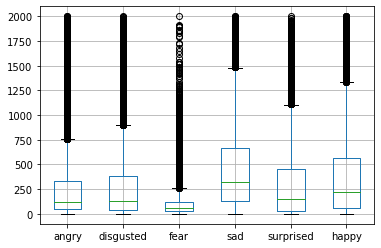

In [ ]:
df_tedio_cluster01.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

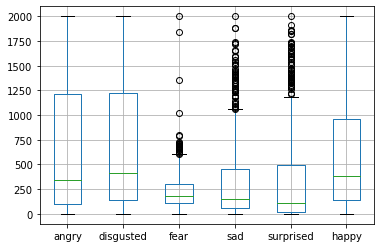

In [ ]:
df_tedio_cluster02.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

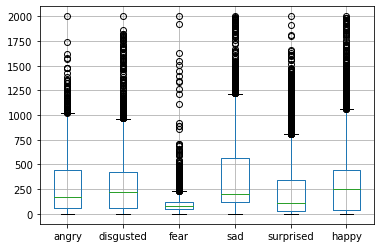

In [ ]:
df_tedio_cluster03.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

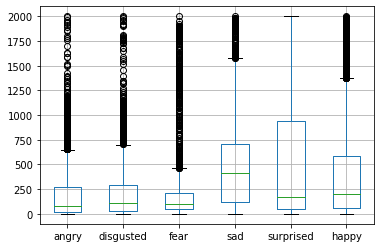

In [ ]:
df_tedio_cluster04.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

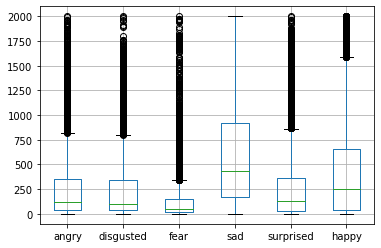

In [ ]:
df_tedio_cluster05.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

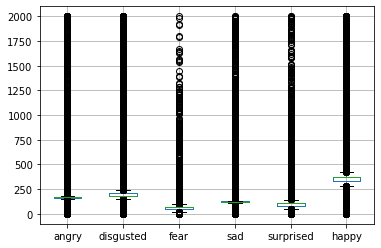

In [ ]:
df_tedio_cluster06.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

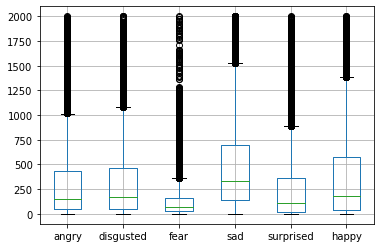

In [ ]:
df_estresse_cluster01.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

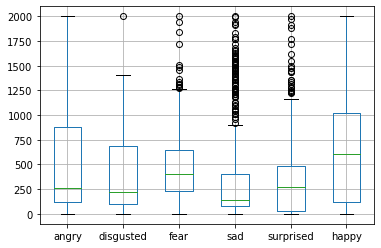

In [ ]:
df_estresse_cluster02.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

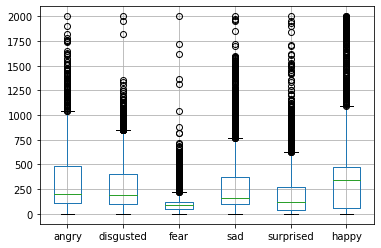

In [ ]:
df_estresse_cluster03.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

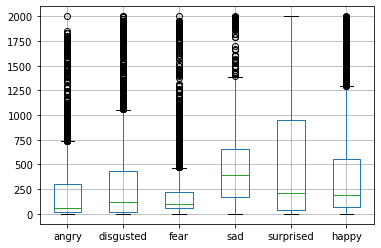

In [ ]:
df_estresse_cluster04.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

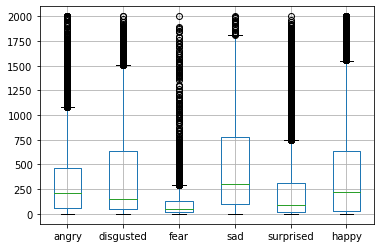

In [ ]:
df_estresse_cluster05.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

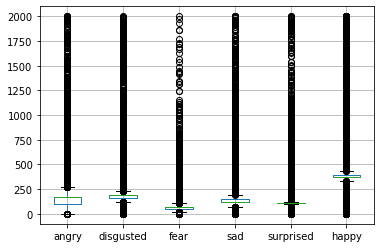

In [ ]:
df_estresse_cluster06.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

## Centróides

In [ ]:
# Calculando e guardando as saídas em log_file
# Centróide = Soma da emoção/ tamanho da emoção
for cluster in clusters:
  for base in bases:
    logs.append('\n')
    logs.append('Cluster {} na base {}\n'.format(cluster, base))
    for emocao in emocoes:
      x = str(cluster)
      globals()['Cluster0'+ str(cluster)+'_'+base+'_'+emocao] = globals()['df_'+base+'_cluster0'+ str(cluster)][emocao].sum()/len(globals()['df_'+base+'_cluster0'+ str(cluster)][emocao]) # cálculo dos centróides
      logs.append('O Centróide do cluster {} em {} na emoção {} é {}\n '.format(cluster,base,emocao,globals()['Cluster0'+ str(cluster)+'_'+base+'_'+emocao]))

log_file.writelines(logs) # gravando os logs no arquivo
log_file.close() # fechando o arquivo

## Visualizando logs

In [ ]:
path_log = '/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/Clusters_Centroides.txt' # Caminho do arquivo 
logs = open(path_log, 'r') # Abertura do arquivo para leitura
for log in logs:
  print(log) # Imprimindo cada linha 